In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("./Untitled.ipynb"), '..')))
from src.bopf.classifier import _load_file, cum_sum
from src.bopf.bop import get_seg_mean, get_seq_mean_std, word_to_number, features_sax_size, BagOfPattern
from src.bopf.slidingwindow import SlidingWindow
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from src.bopf.cvfeatures import ANOVACVFeatures
import heapq

In [2]:
path = "D:/tesis/UCRArchive_2018/Car/Car_TRAIN.tsv"
D, labels = _load_file(path, has_time=False)

In [3]:
class_count = defaultdict(int)
for l in labels:
    class_count[l] += 1

In [4]:
label_index  = {label: i for i,label in enumerate(class_count)}

In [5]:
label_index

{1: 0, 4: 1, 2: 2, 3: 3}

In [6]:
class_count

defaultdict(int, {1: 16, 4: 17, 2: 16, 3: 11})

In [7]:
sum1, sum2 = cum_sum(D)

In [8]:
alphabet_size = 4
window_length = 0.25

COUNTER:  433


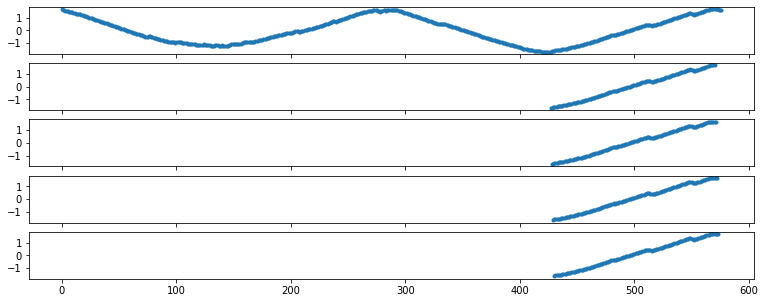

In [9]:
ts_i = 0
ts = D[ts_i]
window_length = 0.25
sw = SlidingWindow(ts, window_length, tol=5)
counter = 0
sub_sequences = []
while True:
    seq_i, seq_j = sw.get_sequence()
    if seq_i == seq_j and seq_i == -1:
        break
    counter += 1
    sub_sequences.append(ts.get_sequence(seq_i, seq_j))
print("COUNTER: ", counter)
N = 5
fig, ax = plt.subplots(N, 1, figsize=(13, 1 * N), sharex=True, sharey=True)
ax[0].plot(ts.t, ts.y, '.')
i = 1
while i < N:
    ax[i].plot(sub_sequences[426 + i].t, sub_sequences[426 + i].y, '.')
    i+=1

In [10]:
sw.window

144.0

In [11]:
bop = BagOfPattern()

In [12]:
%%time
bop_vec, word_count = bop.transform_dataset(D, sum1, sum2)

Wall time: 21.9 s


In [28]:
bop_vec

[array([[2, 2, 2],
        [1, 2, 2],
        [1, 3, 2],
        [1, 3, 3],
        [2, 3, 3],
        [2, 3, 2],
        [2, 2, 2],
        [2, 2, 1],
        [2, 1, 1],
        [2, 0, 1],
        [2, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 1],
        [1, 1, 2],
        [1, 2, 2],
        [1, 3, 3],
        [2, 3, 3],
        [2, 2, 2]], dtype=int64), array([[2, 1, 1],
        [1, 1, 1],
        [1, 2, 2],
        [1, 3, 2],
        [1, 3, 3],
        [2, 3, 3],
        [2, 3, 2],
        [2, 2, 2],
        [2, 2, 1],
        [2, 1, 1],
        [2, 0, 1],
        [2, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 1],
        [1, 2, 2],
        [1, 3, 3],
        [2, 3, 3],
        [2, 2, 2]], dtype=int64), array([[1, 2, 2],
        [1, 3, 2],
        [1, 3, 3],
        [2, 3, 3],
        [2, 3, 2],
        [2, 2, 2],
        [2, 1, 2],
        [2, 1, 1],
        [2, 0, 1],
        [2, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 1],
   

In [26]:
np.mean(bop.for_hist), np.std(bop.for_hist)

(0.09186611512436092, 0.7978792135429587)

In [27]:
word_count[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 2., 0., 0., 0., 1., 2., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 3., 0., 0., 0., 1., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
word_count.shape

(60, 256)

In [16]:
np.shape(labels)

(60,)

In [39]:
import pdb
def ANOVA(word_count, labels_dataset):
    words_vec_size = word_count.shape[1]
    anova_f = np.zeros(words_vec_size)
    for j in range(words_vec_size):
        word_count_j = word_count[:, j]
        label_counts = defaultdict(list)
        is_not_zero = False
        for label_ts, count in zip(labels_dataset, word_count_j):
            if count > 0 and not is_not_zero:
                is_not_zero = True
            label_counts[label_ts].append(count)

        labels, values = zip(*label_counts.items())
        if is_not_zero:
#             pdb.set_trace()
            fvalue, pvalue = stats.f_oneway(*values)
            if np.isnan(fvalue):
                fvalue = 0
            print(fvalue, pvalue)
        else:
            fvalue = 0
        anova_f[j] = fvalue
    return anova_f

anova_f = ANOVA(word_count, labels)

1.1508004094517992 0.33670242648288823
8.846198830409358 6.812236525688355e-05
0.8361111111111106 0.4797446337086212
12.511333333333338 2.2719852866074537e-06
4.5003564075257385 0.006726268367578574
9.987368421052627 2.264475309710607e-05
0 nan
3.387654320987656 0.024190298486949324
7.0376599074528015 0.00042545954105674936
16.5805381449826 7.88132891585173e-08
2.4035631647780784 0.0770970382995071
1.524444444444444 0.21817320476878235
13.51745687055134 9.534804849362583e-07
19.61232123212321 8.137782439682369e-09
16.313676547061878 9.71122849629706e-08
6.977329001212731 0.0004531334243994666
4.799553857170923 0.0048006267262404876
1.3094939322489976 0.2803848832393344


In [40]:
anova_rank_sort = np.argsort(anova_f)[::-1]
idx  = 0
while anova_f[anova_rank_sort[idx]] > 0:
    idx += 1
rank_idx = anova_rank_sort[:idx]
rank_idx, anova_f[rank_idx]

(array([38, 32, 41, 37, 21, 25, 17, 31, 42, 46, 22, 30, 33, 36, 47, 16, 20],
       dtype=int64),
 array([19.61232123, 16.58053814, 16.31367655, 13.51745687, 12.51133333,
         9.98736842,  8.84619883,  7.03765991,  6.977329  ,  4.79955386,
         4.50035641,  3.38765432,  2.40356316,  1.52444444,  1.30949393,
         1.15080041,  0.83611111]))

In [41]:
cv_anova = ANOVACVFeatures(labels, 4, word_count)

In [42]:
%%time
centroid_best, tf_idf_best = cv_anova.cv_run(rank_idx)

D:\tesis\tesis\src\bopf\cvfeatures.py:103: RuntimeWarning: invalid value encountered in double_scalars
  square_cosine_similarity = (self.dists_tf_idfs_p1[j] ** 2) / (self.dists_tf_idfs_p2[j] * self.dists_tf_idfs_p3[j])


centroid match for best 0 anova F: 0.2833333333333333
tf_idf match for best 0 anovaF: 0.26666666666666666
centroid match for best 1 anova F: 0.2833333333333333
tf_idf match for best 1 anovaF: 0.3
centroid match for best 2 anova F: 0.21666666666666667
tf_idf match for best 2 anovaF: 0.26666666666666666
centroid match for best 3 anova F: 0.2833333333333333
tf_idf match for best 3 anovaF: 0.26666666666666666
centroid match for best 4 anova F: 0.2833333333333333
tf_idf match for best 4 anovaF: 0.26666666666666666
centroid match for best 5 anova F: 0.2833333333333333
tf_idf match for best 5 anovaF: 0.26666666666666666
centroid match for best 6 anova F: 0.2833333333333333
tf_idf match for best 6 anovaF: 0.26666666666666666
centroid match for best 7 anova F: 0.2833333333333333
tf_idf match for best 7 anovaF: 0.23333333333333334
centroid match for best 8 anova F: 0.2833333333333333
tf_idf match for best 8 anovaF: 0.2
centroid match for best 9 anova F: 0.2833333333333333
tf_idf match for best 9

In [43]:
centroid_best, tf_idf_best

(16, 1)

In [22]:
cv_anova.class_count_words

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
ts.size() - 144

433

In [33]:
stats.f_oneway([2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2])

F_onewayResult(statistic=nan, pvalue=nan)